**In this notebook we'll perform further feature selection and add interaction terms to derive our final model**

In [1]:
from module2_scripts.model import FittedModel, ModelValidation
import pandas as pd
import pickle

In [2]:
X = pd.read_csv('working_datasets/X_processed.csv')
y = pd.read_csv('working_datasets/y_processed.csv')

Here we've import the FittedModel and ModelValidation classes from the model module to run and validate the final model.

The FittedModule class has a method .generate_final_X(), which uses stepwise selection to choose features, and adds interaction variables. The number of interaction variables to add to the predictor variable dataframe wil be specified as an argument when initializing the object. After the predictor variables are all finalized, we'll run OLS regression and take a look at the report. We'll then also initialize a ModelValidation object to use train-test-split and K-fold cross validation to validate our model. We're going to run this process 4 times, adding a different number of interaction terms (5, 10, 20 and 50) to each iteration.

---------- Generating Model with 5 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bedrooms_log                   with p-value 0.0
Add  bathrooms_log                  with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  grade_log                      with p-value 0.0
Drop bedrooms_log                   with p-value 0.793536
Add  zipcode_dummy__F               with p-value 7.66509e-310


C:\Users\jabdullah\f\module2_proj\module2_scripts\model.py:213: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  worst_feature = pvalues.argmax()


Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-value 2.45463e-46
Add  zipcode_dummy__I               with p-value 2.62576e-29
Add  bedrooms_log                   with p-value 1.21404e-29
Add  view_dummy__1                  with p-value 1.74401e-26
Add  floors_log                     with p-value 5.98136e-25
Add  condition_log                  with p-value 7.32848e-17
Add  zipcode_dummy__G               with p-value 6.12633e-14
Add  sqft_basement_dummy__1         with p-value 0.000159553
Add  zipcode_dummy_

Add  view_dummy__4                  with p-value 4.39074e-231
Add  zipcode_dummy__C               with p-value 2.00501e-69
Add  view_dummy__3                  with p-value 5.56966e-69
Add  waterfront_dummy__1            with p-value 6.47863e-58
Add  zipcode_dummy__G               with p-value 2.1637e-39
Add  zipcode_dummy__I               with p-value 1.57299e-48
Add  view_dummy__2                  with p-value 7.07106e-35
Add  condition_log                  with p-value 6.84919e-28
Add  view_dummy__1                  with p-value 2.06785e-24
Add  floors_log                     with p-value 3.19112e-25
Add  bathrooms_log*sqft_living_log  with p-value 7.93625e-14
Add  zipcode_dummy__B               with p-value 3.28244e-09
Add  grade_log*bedrooms_log         with p-value 1.66397e-06
Add  bathrooms_log*grade_log        with p-value 2.12749e-05
=== Completed selection of features === 
=== Completed generating final X dataframe ===
---------- Running OLS Regression Summary Report for Fitte

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     2303.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:55:23   Log-Likelihood:            -2.7042e+05
No. Observations:               20332   AIC:                         5.409e+05
Df Residuals:                   20307   BIC:                         5.411e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          5.301e+05   2060.353    257.278      0.000    5.26e+05    5.34e+05
bedrooms_log                  -8649.3058   1433.556     -6.033      0.000   -1.15e+04   -5839.419
grade_log*sqft_living_log      3.834e+04   1802.670     21.271      0.000    3.48e+04    4.19e+04
bathrooms_log                  2.629e+04   1874.410     14.026      0.000    2.26e+04       3e+04
yr_built_log                  -5.647e+04   1570.556    -35.956      0.000   -5.95e+04   -5.34e+04
grade_log                      9.959e+04   1691.553     58.878      0.000    9.63e+04    1.03e+05
zipcode_dummy__F              -2.424e+05   4283.539    -56.585      0.000   -2.51e+05   -2.34e+05
sqft_living_log                8.947e+04   2075.868     43.100      0.000    8.54e+04    9.35e+04
zipcode_dummy__D               -2.07e+05   4239.724    -48.830      0.000   -2.15e+05   -1.99e+05
zipcode_dummy__H              -1.956e+05   4746.253    -41.219      0.000   -2.05e+05   -1.86e+05
zipcode_dummy__E              -1.781e+05   4522.214    -39.378      0.000   -1.87e+05   -1.69e+05
view_dummy__4                  2.465e+05   1.15e+04     21.402      0.000    2.24e+05    2.69e+05
zipcode_dummy__C               3.583e+04   3752.261      9.549      0.000    2.85e+04    4.32e+04
view_dummy__3                  1.299e+05   7341.649     17.696      0.000    1.16e+05    1.44e+05
waterfront_dummy__1            2.969e+05    1.8e+04     16.491      0.000    2.62e+05    3.32e+05
zipcode_dummy__G              -6.641e+04   4347.945    -15.275      0.000   -7.49e+04   -5.79e+04
zipcode_dummy__I              -1.086e+05   6841.360    -15.870      0.000   -1.22e+05   -9.52e+04
view_dummy__2                  6.598e+04   5201.613     12.684      0.000    5.58e+04    7.62e+04
condition_log                  1.433e+04   1122.169     12.766      0.000    1.21e+04    1.65e+04
view_dummy__1                  8.741e+04   8405.042     10.400      0.000    7.09e+04    1.04e+05
floors_log                     1.112e+04   1328.496      8.374      0.000    8520.818    1.37e+04
bathrooms_log*sqft_living_log  8671.0714   1478.226      5.866      0.000    5773.630    1.16e+04
zipcode_dummy__B              -2.149e+04   3618.263     -5.940      0.000   -2.86e+04   -1.44e+04
grade_log*bedrooms_log        -6197.0643   1271.967     -4.872      0.000   -8690.221   -3703.907
bathrooms_log*grade_log        8250.1200   1940.259      4.252      0.000    4447.055    1.21e+04
==============================================================================
Omnibus:                     6504.657   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40549.038
Skew:                           1.394   Prob(JB):                         0.00
Kurtosis:              

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,144210.520
Test,146104.566
,sqrt_mse
folds,
5,145017.190
10,145034.528
20,144893.321
50,144851.890


== Displaying Predicted vs Actual Y values ==


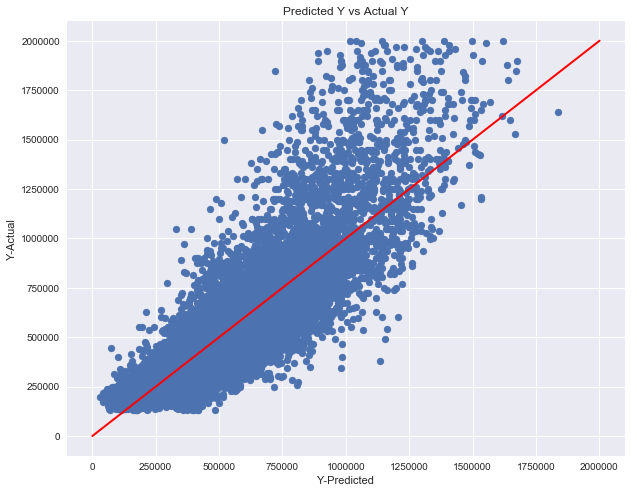

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


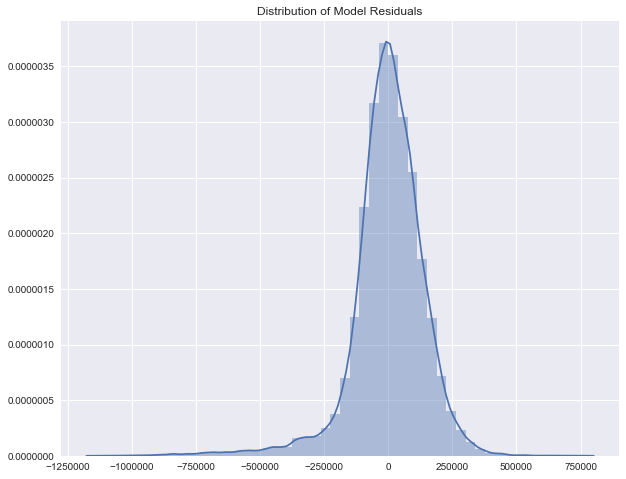


---------- Generating Model with 10 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bedrooms_log                   with p-value 0.0
Add  bathrooms_log                  with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  grade_log                      with p-value 0.0
Drop bedrooms_log                   with p-value 0.793536
Add  zipcode_dummy__F               with p-value 7.66509e-310


C:\Users\jabdullah\f\module2_proj\module2_scripts\model.py:213: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  worst_feature = pvalues.argmax()


Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-value 2.45463e-46
Add  zipcode_dummy__I               with p-value 2.62576e-29
Add  bedrooms_log                   with p-value 1.21404e-29
Add  view_dummy__1                  with p-value 1.74401e-26
Add  floors_log                     with p-value 5.98136e-25
Add  condition_log                  with p-value 7.32848e-17
Add  zipcode_dummy__G               with p-value 6.12633e-14
Add  sqft_basement_dummy__1         with p-value 0.000159553
Add  zipcode_dummy_

Add  zipcode_dummy__E               with p-value 6.10704e-240
Add  view_dummy__4                  with p-value 3.02485e-223
Add  waterfront_dummy__1            with p-value 2.41485e-71
Add  view_dummy__3                  with p-value 3.19719e-52
Add  zipcode_dummy__I               with p-value 1.84094e-47
Add  zipcode_dummy__G               with p-value 1.10287e-45
Add  condition_log                  with p-value 7.69265e-36
Add  view_dummy__2                  with p-value 8.00872e-31
Add  floors_log                     with p-value 1.8852e-21
Add  view_dummy__1                  with p-value 4.47573e-23
Add  sqft_living_log*zipcode_dummy__C with p-value 2.7038e-12
Add  sqft_living_log*floors_log     with p-value 4.67664e-12
Add  zipcode_dummy__B               with p-value 1.68581e-10
Add  sqft_living_log*bedrooms_log   with p-value 1.66077e-08
Add  bathrooms_log*sqft_living_log  with p-value 2.43874e-10
Add  grade_log*floors_log           with p-value 0.00217755
Add  zipcode_dummy__C  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     2039.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:56:13   Log-Likelihood:            -2.7018e+05
No. Observations:               20332   AIC:                         5.404e+05
Df Residuals:                   20303   BIC:                         5.407e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             5.348e+05   2132.269    250.816      0.000    5.31e+05    5.39e+05
bedrooms_log                     -8913.4681   1410.666     -6.319      0.000   -1.17e+04   -6148.449
grade_log*sqft_living_log         3.287e+04   1387.679     23.686      0.000    3.01e+04    3.56e+04
grade_log*zipcode_dummy__C        3.375e+04   4426.100      7.625      0.000    2.51e+04    4.24e+04
grade_log*sqft_basement_dummy__1   2.85e+04   2473.133     11.522      0.000    2.36e+04    3.33e+04
bathrooms_log                     2.445e+04   1838.971     13.294      0.000    2.08e+04    2.81e+04
yr_built_log                     -5.508e+04   1567.837    -35.134      0.000   -5.82e+04    -5.2e+04
grade_log                         8.263e+04   1986.322     41.599      0.000    7.87e+04    8.65e+04
zipcode_dummy__F                 -2.458e+05   4289.099    -57.301      0.000   -2.54e+05   -2.37e+05
sqft_living_log                   8.845e+04   2129.401     41.540      0.000    8.43e+04    9.26e+04
zipcode_dummy__D                 -2.105e+05   4224.227    -49.824      0.000   -2.19e+05   -2.02e+05
zipcode_dummy__H                 -2.004e+05   4776.882    -41.942      0.000    -2.1e+05   -1.91e+05
zipcode_dummy__E                 -1.822e+05   4489.534    -40.593      0.000   -1.91e+05   -1.73e+05
view_dummy__4                     2.402e+05   1.14e+04     20.984      0.000    2.18e+05    2.63e+05
waterfront_dummy__1               3.053e+05   1.78e+04     17.146      0.000     2.7e+05     3.4e+05
view_dummy__3                      1.24e+05   7314.038     16.948      0.000     1.1e+05    1.38e+05
zipcode_dummy__I                 -1.095e+05   6830.505    -16.025      0.000   -1.23e+05   -9.61e+04
zipcode_dummy__G                 -5.646e+04   4368.828    -12.922      0.000    -6.5e+04   -4.79e+04
condition_log                     1.484e+04   1112.436     13.342      0.000    1.27e+04     1.7e+04
view_dummy__2                     6.332e+04   5158.746     12.275      0.000    5.32e+04    7.34e+04
floors_log                        1.155e+04   1314.838      8.783      0.000    8971.080    1.41e+04
view_dummy__1                     8.245e+04   8324.363      9.904      0.000    6.61e+04    9.88e+04
sqft_living_log*zipcode_dummy__C  3.039e+04   5026.334      6.045      0.000    2.05e+04    4.02e+04
sqft_living_log*floors_log        4483.5241   1653.638      2.711      0.007    1242.260    7724.788
zipcode_dummy__B                 -1.747e+04   3631.443     -4.812      0.000   -2.46e+04   -1.04e+04
sqft_living_log*bedrooms_log     -8459.2065   1118.201     -7.565      0.000   -1.07e+04   -6267.441
bathrooms_log*sqft_living_log     1.156e+04   1699.088      6.802      0.000    8227.583    1.49e+04
grade_log*floors_log              5626.4290   1713.20

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,142413.522
Test,144732.006
,sqrt_mse
folds,
5,143496.696
10,143464.059
20,143258.093
50,143203.087


== Displaying Predicted vs Actual Y values ==


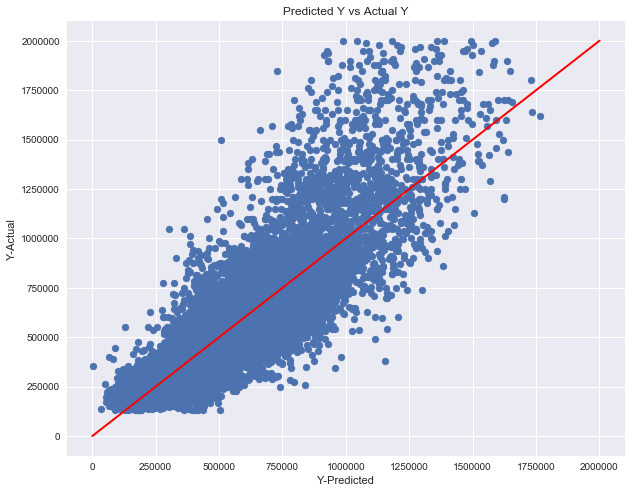

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


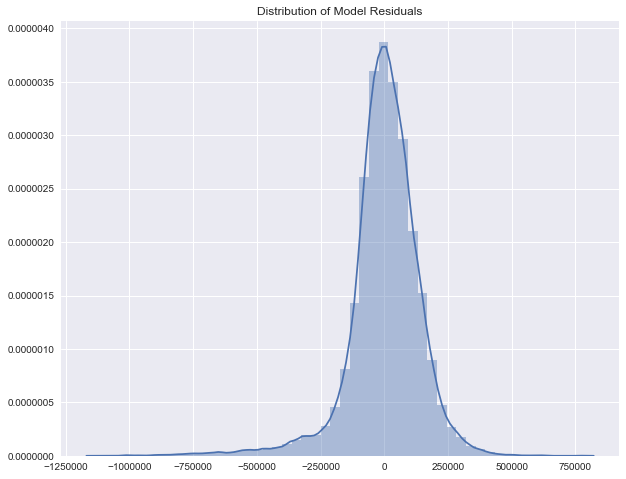


---------- Generating Model with 20 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bedrooms_log                   with p-value 0.0
Add  bathrooms_log                  with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  grade_log                      with p-value 0.0
Drop bedrooms_log                   with p-value 0.793536
Add  zipcode_dummy__F               with p-value 7.66509e-310


C:\Users\jabdullah\f\module2_proj\module2_scripts\model.py:213: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  worst_feature = pvalues.argmax()


Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-value 2.45463e-46
Add  zipcode_dummy__I               with p-value 2.62576e-29
Add  bedrooms_log                   with p-value 1.21404e-29
Add  view_dummy__1                  with p-value 1.74401e-26
Add  floors_log                     with p-value 5.98136e-25
Add  condition_log                  with p-value 7.32848e-17
Add  zipcode_dummy__G               with p-value 6.12633e-14
Add  sqft_basement_dummy__1         with p-value 0.000159553
Add  zipcode_dummy_

Add  zipcode_dummy__E               with p-value 1.37489e-231
Add  view_dummy__4                  with p-value 7.15875e-228
Add  waterfront_dummy__1            with p-value 3.76302e-72
Add  grade_log*zipcode_dummy__F     with p-value 1.67541e-71
Add  view_dummy__3                  with p-value 3.27284e-53
Add  grade_log*zipcode_dummy__H     with p-value 6.6913e-45
Add  zipcode_dummy__G               with p-value 1.42218e-46
Add  zipcode_dummy__I               with p-value 1.36488e-53
Add  grade_log*zipcode_dummy__D     with p-value 4.85473e-54
Add  view_dummy__2                  with p-value 5.82159e-31
Add  floors_log*sqft_basement_dummy__1 with p-value 2.39476e-31
Add  condition_log                  with p-value 2.23905e-30
Add  view_dummy__1                  with p-value 4.94244e-25
Add  zipcode_dummy__B               with p-value 2.20599e-18
Add  bathrooms_log*sqft_living_log  with p-value 2.00719e-07
Add  zipcode_dummy__F*sqft_living_log with p-value 3.8624e-07
Add  bedrooms_log  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1885.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:57:11   Log-Likelihood:            -2.6976e+05
No. Observations:               20332   AIC:                         5.396e+05
Df Residuals:                   20299   BIC:                         5.399e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              5.463e+05   1766.876    309.180      0.000    5.43e+05     5.5e+05
grade_log*sqft_basement_dummy__1   9267.2247   2451.789      3.780      0.000    4461.520    1.41e+04
sqft_living_log*zipcode_dummy__C   2.946e+04   4878.359      6.040      0.000    1.99e+04     3.9e+04
bathrooms_log                      2.444e+04   1784.907     13.693      0.000    2.09e+04    2.79e+04
yr_built_log                      -5.263e+04   1452.286    -36.240      0.000   -5.55e+04   -4.98e+04
grade_log                          1.035e+05   2084.964     49.619      0.000    9.94e+04    1.08e+05
grade_log*sqft_living_log          3.344e+04   1241.845     26.929      0.000     3.1e+04    3.59e+04
zipcode_dummy__F                    -2.6e+05   4021.176    -64.654      0.000   -2.68e+05   -2.52e+05
zipcode_dummy__D                  -2.297e+05   4159.551    -55.211      0.000   -2.38e+05   -2.22e+05
sqft_living_log                    9.583e+04   2225.936     43.049      0.000    9.15e+04       1e+05
zipcode_dummy__H                  -2.179e+05   4531.207    -48.083      0.000   -2.27e+05   -2.09e+05
zipcode_dummy__E                  -1.787e+05   4282.292    -41.734      0.000   -1.87e+05    -1.7e+05
view_dummy__4                      2.312e+05   1.12e+04     20.638      0.000    2.09e+05    2.53e+05
waterfront_dummy__1                3.097e+05   1.74e+04     17.767      0.000    2.76e+05    3.44e+05
grade_log*zipcode_dummy__F        -6.481e+04   6069.721    -10.678      0.000   -7.67e+04   -5.29e+04
view_dummy__3                      1.186e+05   7158.208     16.564      0.000    1.05e+05    1.33e+05
grade_log*zipcode_dummy__H        -7.524e+04   4761.822    -15.801      0.000   -8.46e+04   -6.59e+04
zipcode_dummy__G                  -7.675e+04   4135.758    -18.557      0.000   -8.49e+04   -6.86e+04
zipcode_dummy__I                  -1.185e+05   6562.002    -18.064      0.000   -1.31e+05   -1.06e+05
grade_log*zipcode_dummy__D         -4.92e+04   5960.020     -8.255      0.000   -6.09e+04   -3.75e+04
view_dummy__2                      6.106e+04   5053.293     12.084      0.000    5.12e+04     7.1e+04
floors_log*sqft_basement_dummy__1  1.992e+04   2003.153      9.947      0.000     1.6e+04    2.39e+04
condition_log                      1.258e+04   1071.444     11.743      0.000    1.05e+04    1.47e+04
view_dummy__1                      7.975e+04   8156.480      9.777      0.000    6.38e+04    9.57e+04
zipcode_dummy__B                  -3.191e+04   3323.861     -9.600      0.000   -3.84e+04   -2.54e+04
bathrooms_log*sqft_living_log      1.276e+04   1700.897      7.503      0.000    9427.443    1.61e+04
zipcode_dummy__F*sqft_living_log  -3.469e+04   6304.637     -5.503      0.000   -4.71e+04   -2.23e+04
bedrooms_log           

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,139429.726
Test,142173.524
,sqrt_mse
folds,
5,140439.038
10,140438.356
20,140325.240
50,140279.955


== Displaying Predicted vs Actual Y values ==


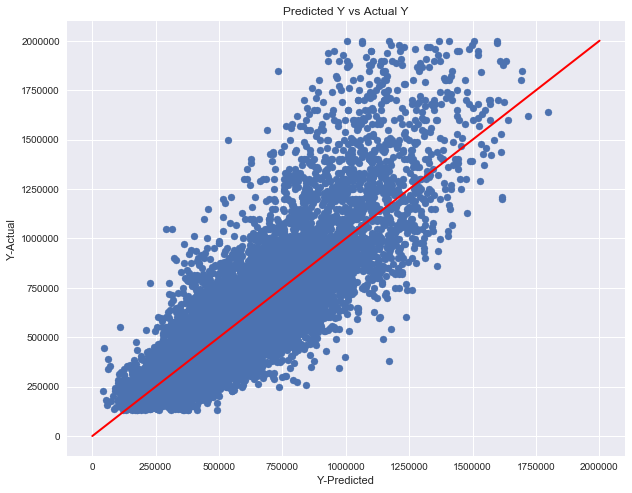

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


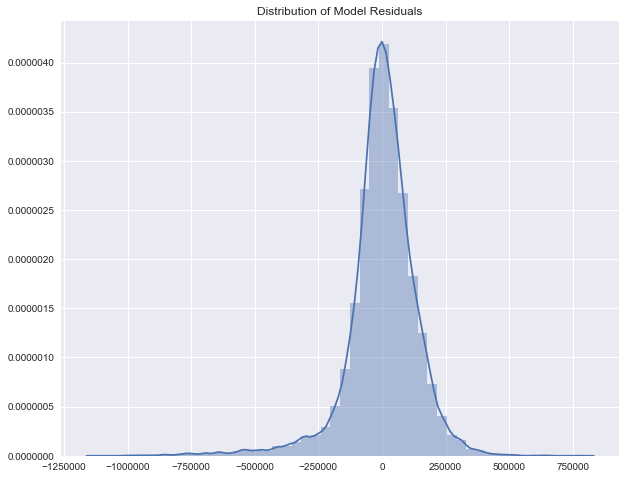


---------- Generating Model with 50 Interaction Terms ----------

=== Beginning process of generating final X dataframe using stepwise feature selection and interactions ===
=== Beginning process of using stepwise selecton for feature selection ===
Add  bedrooms_log                   with p-value 0.0
Add  bathrooms_log                  with p-value 0.0
Add  yr_built_log                   with p-value 0.0
Add  grade_log                      with p-value 0.0
Drop bedrooms_log                   with p-value 0.793536
Add  zipcode_dummy__F               with p-value 7.66509e-310


C:\Users\jabdullah\f\module2_proj\module2_scripts\model.py:213: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  worst_feature = pvalues.argmax()


Add  sqft_living_log                with p-value 6.70741e-253
Add  zipcode_dummy__D               with p-value 4.06904e-290
Add  zipcode_dummy__H               with p-value 5.05561e-233
Add  view_dummy__4                  with p-value 1.88763e-198
Add  zipcode_dummy__E               with p-value 2.23267e-220
Add  view_dummy__3                  with p-value 2.12428e-88
Add  zipcode_dummy__C               with p-value 1.54148e-87
Add  waterfront_dummy__1            with p-value 9.78468e-51
Add  view_dummy__2                  with p-value 2.45463e-46
Add  zipcode_dummy__I               with p-value 2.62576e-29
Add  bedrooms_log                   with p-value 1.21404e-29
Add  view_dummy__1                  with p-value 1.74401e-26
Add  floors_log                     with p-value 5.98136e-25
Add  condition_log                  with p-value 7.32848e-17
Add  zipcode_dummy__G               with p-value 6.12633e-14
Add  sqft_basement_dummy__1         with p-value 0.000159553
Add  zipcode_dummy_

Add  view_dummy__4                  with p-value 1.84517e-227
Add  yr_built_log*zipcode_dummy__C  with p-value 2.90389e-93
Add  grade_log*zipcode_dummy__F     with p-value 3.40689e-73
Add  waterfront_dummy__1            with p-value 9.26861e-72
Add  yr_built_log*sqft_living_log   with p-value 4.78186e-63
Add  view_dummy__3                  with p-value 6.67371e-48
Add  zipcode_dummy__G               with p-value 1.77683e-46
Add  zipcode_dummy__I               with p-value 1.89472e-54
Add  floors_log*sqft_basement_dummy__1 with p-value 4.53898e-47
Add  grade_log*zipcode_dummy__H     with p-value 7.04462e-48
Add  grade_log*zipcode_dummy__D     with p-value 6.88857e-54
Add  view_dummy__2                  with p-value 8.40454e-31
Add  yr_built_log*grade_log         with p-value 6.75295e-29
Drop grade_log*sqft_basement_dummy__1 with p-value 0.58164


C:\Users\jabdullah\f\module2_proj\module2_scripts\model.py:213: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  worst_feature = pvalues.argmax()


Add  zipcode_dummy__B               with p-value 4.37114e-30
Add  zipcode_dummy__E*waterfront_dummy__1 with p-value 1.01393e-28
Add  bathrooms_log                  with p-value 1.86717e-26
Drop yr_built_log*sqft_living_log   with p-value 0.298951
Add  grade_log*zipcode_dummy__C     with p-value 5.35908e-26
Add  view_dummy__1                  with p-value 4.20729e-21
Add  grade_log*zipcode_dummy__E     with p-value 1.03885e-21
Add  condition_log                  with p-value 6.9615e-21
Add  yr_built_log*sqft_basement_dummy__1 with p-value 3.06923e-20
Add  grade_log*zipcode_dummy__I     with p-value 1.58351e-19
Add  bathrooms_log*yr_built_log     with p-value 1.64617e-16
Add  bathrooms_log*sqft_living_log  with p-value 1.70933e-11
Add  bedrooms_log                   with p-value 1.21425e-10
Add  sqft_living_log*bedrooms_log   with p-value 5.64402e-14
Add  yr_built_log*view_dummy__4     with p-value 4.59355e-10
Add  zipcode_dummy__F*sqft_living_log with p-value 8.00357e-08
Add  yr_built_l

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:59:14   Log-Likelihood:            -2.6896e+05
No. Observations:               20332   AIC:                         5.380e+05
Df Residuals:                   20283   BIC:                         5.384e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 5.492e+05   2004.973    273.915      0.000    5.45e+05    5.53e+05
sqft_living_log*zipcode_dummy__C      4.443e+04   4783.059      9.290      0.000    3.51e+04    5.38e+04
grade_log                             9.847e+04   2315.128     42.535      0.000    9.39e+04    1.03e+05
yr_built_log                         -3.814e+04   1917.277    -19.891      0.000   -4.19e+04   -3.44e+04
sqft_living_log                       9.763e+04   2239.180     43.600      0.000    9.32e+04    1.02e+05
grade_log*sqft_living_log             3.031e+04   1788.046     16.954      0.000    2.68e+04    3.38e+04
zipcode_dummy__F                     -2.661e+05   3908.515    -68.092      0.000   -2.74e+05   -2.58e+05
zipcode_dummy__D                     -2.439e+05   4284.938    -56.926      0.000   -2.52e+05   -2.36e+05
zipcode_dummy__H                     -2.303e+05   4490.485    -51.275      0.000   -2.39e+05   -2.21e+05
zipcode_dummy__E                     -2.003e+05   4871.314    -41.116      0.000    -2.1e+05   -1.91e+05
view_dummy__4                         2.392e+05   1.11e+04     21.491      0.000    2.17e+05    2.61e+05
yr_built_log*zipcode_dummy__C        -1.404e+05   5108.027    -27.480      0.000    -1.5e+05    -1.3e+05
grade_log*zipcode_dummy__F            -6.49e+04   5900.155    -10.999      0.000   -7.65e+04   -5.33e+04
waterfront_dummy__1                   4.337e+05    2.2e+04     19.729      0.000    3.91e+05    4.77e+05
view_dummy__3                          1.13e+05   6912.585     16.347      0.000    9.94e+04    1.27e+05
zipcode_dummy__G                     -8.631e+04   4047.515    -21.324      0.000   -9.42e+04   -7.84e+04
zipcode_dummy__I                     -1.316e+05   6358.202    -20.697      0.000   -1.44e+05   -1.19e+05
floors_log*sqft_basement_dummy__1     2.697e+04   2124.039     12.699      0.000    2.28e+04    3.11e+04
grade_log*zipcode_dummy__H           -6.005e+04   6745.853     -8.902      0.000   -7.33e+04   -4.68e+04
grade_log*zipcode_dummy__D           -7.059e+04   6524.191    -10.820      0.000   -8.34e+04   -5.78e+04
view_dummy__2                         6.213e+04   4870.421     12.757      0.000    5.26e+04    7.17e+04
yr_built_log*grade_log                -2.23e+04   1499.399    -14.870      0.000   -2.52e+04   -1.94e+04
zipcode_dummy__B                     -3.792e+04   3253.451    -11.655      0.000   -4.43e+04   -3.15e+04
zipcode_dummy__E*waterfront_dummy__1 -2.774e+05   2.99e+04     -9.275      0.000   -3.36e+05   -2.19e+05
bathrooms_log                         3.395e+04   2285.980     14.852      0.000    2.95e+04    3.84e+04
grade_log*zipcode_dummy__C            4.953e+04   4472.018     11.075      0.000    4.08e+04    5.83e+04
view_dummy__1                         

--- Displaying Train and Test Split Sizes ---


,split_sizes
X_train,16265
X_test,4067
y_train,16265
y_test,4067


---------- Validation Report ----------

Train-Test Split MSE	K-Fold Cross Val MSE


,sqrt_mse
set,
Train,133858.294
Test,137440.424
,sqrt_mse
folds,
5,135603.476
10,135557.226
20,135171.939
50,135080.362


== Displaying Predicted vs Actual Y values ==


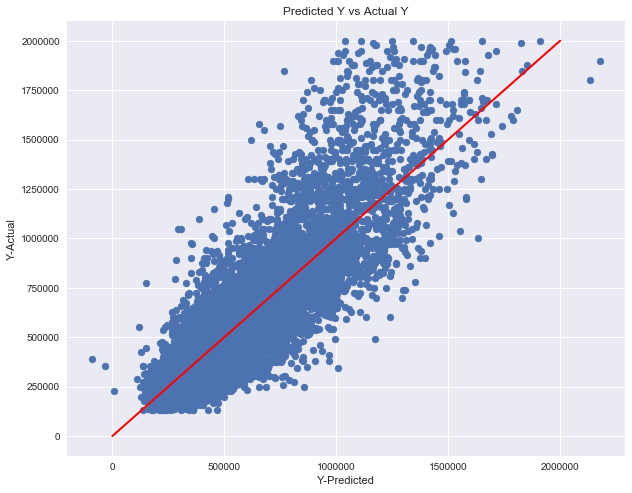

C:\Users\jabdullah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


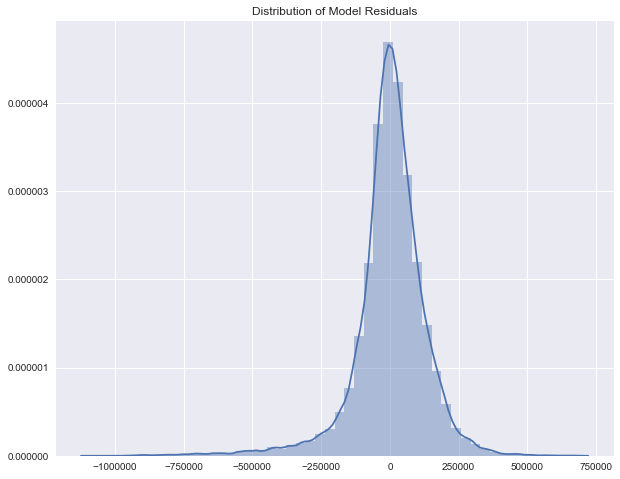

In [3]:
for i in [5, 10, 20, 50]:
    
    print(f'---------- Generating Model with {i} Interaction Terms ----------')
    print('='*80, '\n')
    fitted_model = FittedModel(X, y, n_interactions=i)
    fitted_model.generate_final_X()
    model = fitted_model.ols_summary()
    fitted_model_validation = ModelValidation(fitted_model.X, fitted_model.y)
    fitted_model_validation.validation_report()
    print('='*80, '\n')
    
    #save the model with interaction terms == 10 for later use 
    #we'll use this one for deriving prices of houses using user inputs
    if i == 10:
        pickle.dump(model, open("pkl/model.p","wb"))

In our model runs, as expected we see that the adjusted R-squared increased as we add more interaction terms to our predictor variables, with it being as high as 76.7% when adding 50 interaction terms. 

For simplicity, we'll focus on the model run with +10 interaction terms. We see that adjusted R-squared is 73.7%, which means that 73.7% of the variance in our target variable is explained by our predictor variables, indicating a decent model fit.
The model has a positive skew of +1.373, suggesting from strong outliers in the right tail, 
and that the peak of the distribution is to the left of the mean. Our model distribution's
kurtosis is +9.407, signifying a highly leptokurtic distribution, meaning heavier tails and 
more outliers. The skewness and kurtosis values explain the high Jarque-Bera value, 
telling us that the distribution is not normal. While this is not exactly ideal, we've already
done a lot of data cleaning to reduce outliers, and even removed 5-6% of rows of our overall
dataset in the process. To avoid further loss of data, it was better to just leave any
remaining outliers. Also, "outliers" may be a misleading term for these variables contributing
to the high skewness and kurtosis. Naturally, with any housing market/segment, there will be
a portion of housing that has a property value that is a lot higher than the rest of the 
population. This isn't an issue with the dataset, but moreso an inherent characteristic 
of the environment, which can be due to other factors outside the scope of this model, such as
income distribution, disparity, etc. The low cond. number shows us that we've removed any
issues of multicollinearity from our model. 

While these numbers could all be improved if we just log transform the dependent variable, the model would become a bit difficult to interpret, so for the sake of keeping interpretation simple, the dependent variable's units were left as is.

For model validation, we applied train-test split and K-fold cross validation tests to see what the square root of the mean squared errors would be when applying the model to the test data. Looking at the more reliable cross validation method, we see that our sqrt(mse) are around ~143k when running with 5, 10, 20 and 50 folds. Given the units of the dependent variable, this is a pretty good result. 

Also, note that from our EDA we expected that our model would reflect positive coefficients for the dummy variables 'zipcode__dummy_C' and 'waterfront__dummy_1', and we see exactly that. 

We lastly can take a look at the predicted vs actual y plots for each iteration. It's clear that predicted vs. actual Y have a linear relationship, with the deviations around the linear y_pred=y_actual line increasing as we go further out on both axes. Also, we can take a look at the distribution of model residuals as well. The shapes of the distributions resemble that of a normal distribution but with some negative skewness and high kurtosis, signifying that there are a few cases where the model does not predict the Y value very well. Again, given how much of our dataset we've already cleaned out plus our aim to avoid overtraining the model, we'll accept these outlier residuals.